### This .ipynb file is submitted by co23btech11024

### Case (b) is solved in this file

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani
import math
import time

In [14]:
x_initial = 0
x_final   = 10
t_initial = 0
t_final   = 50

In [15]:
nx = 101
c  = 0.5

In [16]:
dx = (x_final-x_initial)/(nx-1)
dt = 1.1*dx/c

In [17]:
# implemented sin(x) = sqrt(1-cos(x)**2), as np.sin(x) is inaccurate at points like x=np.pi
def u_t0(x):
    a=np.pi*x/x_final
    return math.copysign(np.sqrt(1-np.cos(a)**2),np.sin(a))
def u_x0(t):
    return 0

In [18]:
def ux_forward(i,j):
    return (u[i][j+1]-u[i][j])/dx

def ux_backward(i,j):
    return (u[i][j]-u[i][j-1])/dx

In [19]:
# Each row corresponds to particular time instant
# Each column corresponds to particular spatial instant
u=np.zeros((math.floor((t_final-t_initial)/dt)+1,nx))
x=np.linspace(x_initial,x_final, nx)

In [20]:
for i in range(u.shape[0]-1):
    for j in range(u.shape[1]):
        if i==0:
            u[i][j] = u_t0(x[j])
        if j==0:
            u[i][j] = u_x0(t_initial+i*dt)
        if c>0:
            u[i+1][j] = u[i][j] - dt*(c*ux_backward(i,j))
        elif c<0:
            u[i+1][j] = u[i][j] - dt*(c*ux_forward(i,j))

#### Here I have plotted wave at 10 consecutive time instants
#### Scroll down to see wave propagation

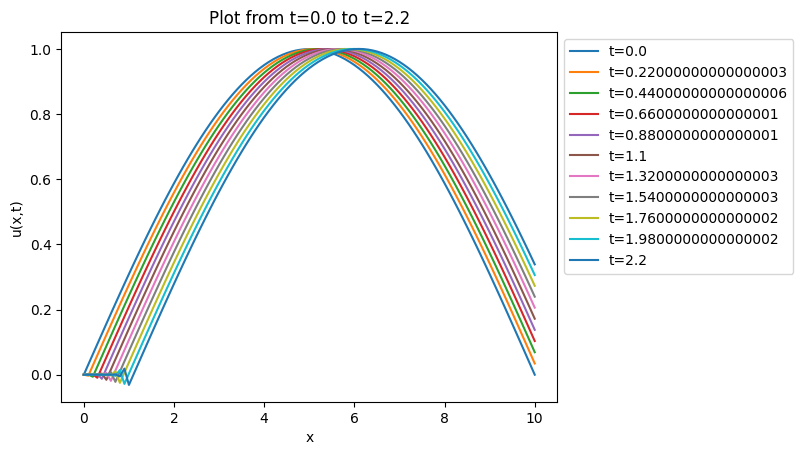

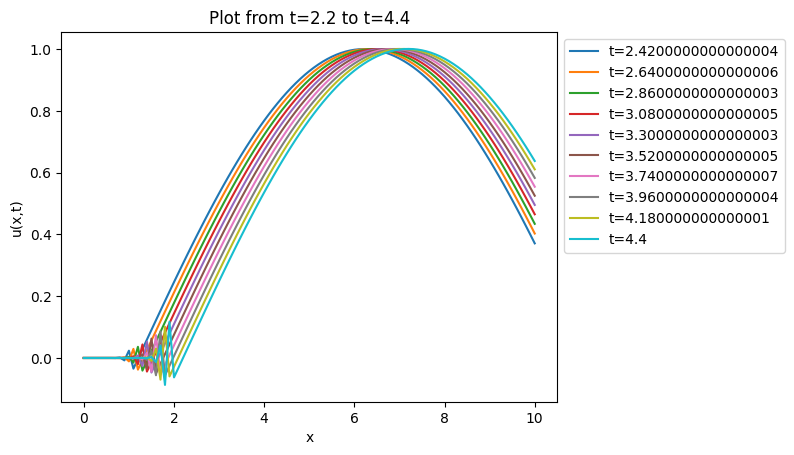

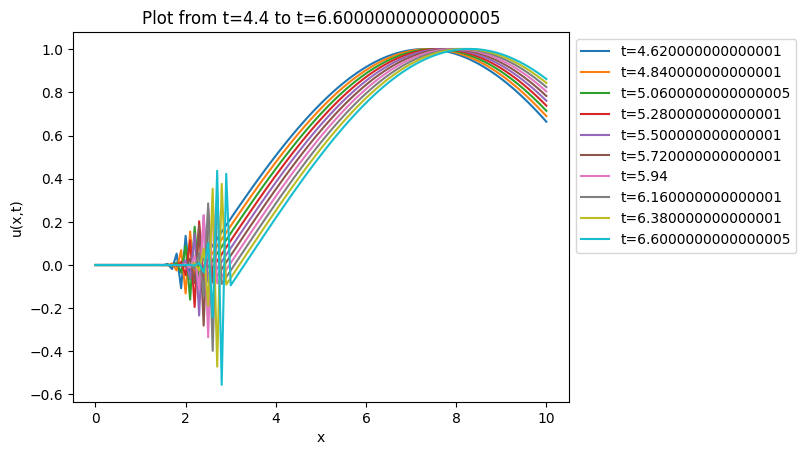

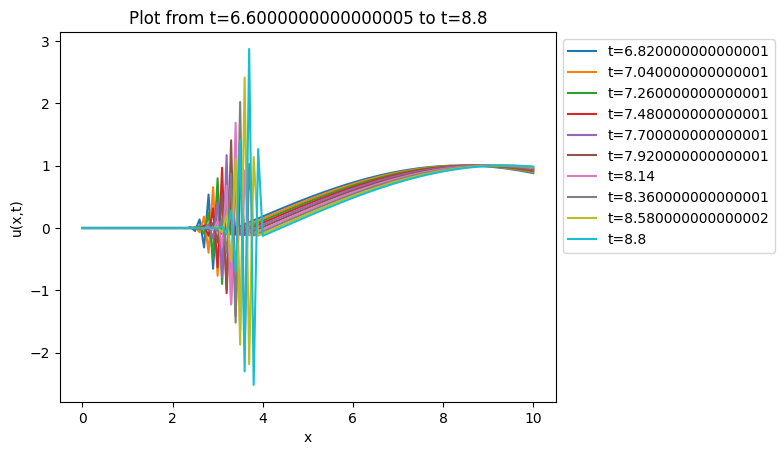

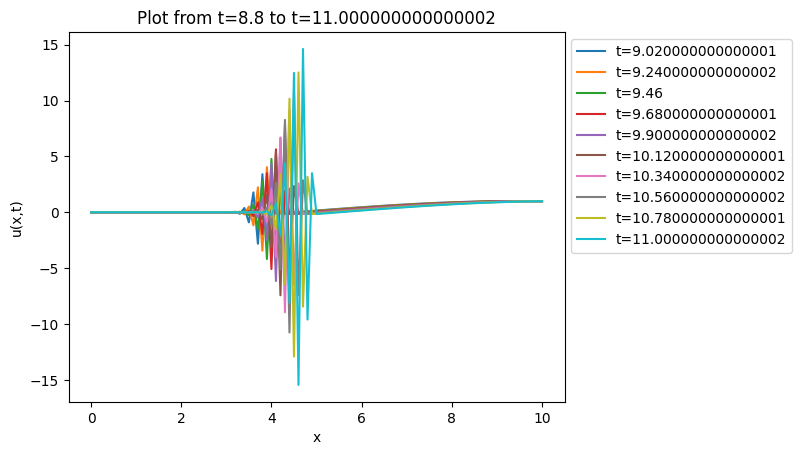

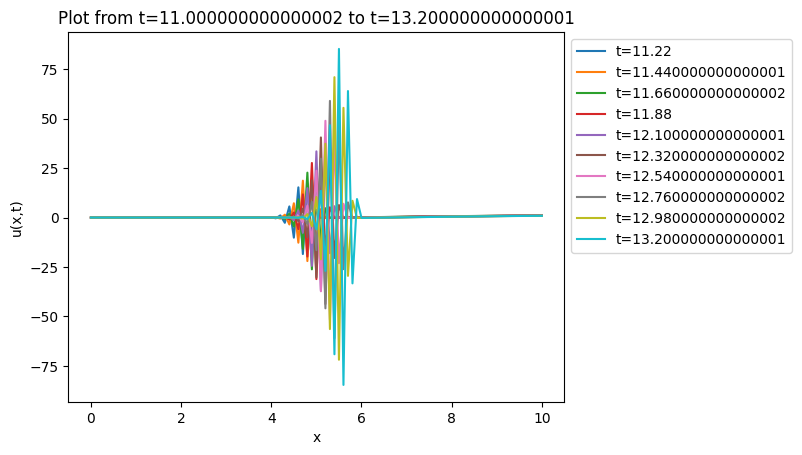

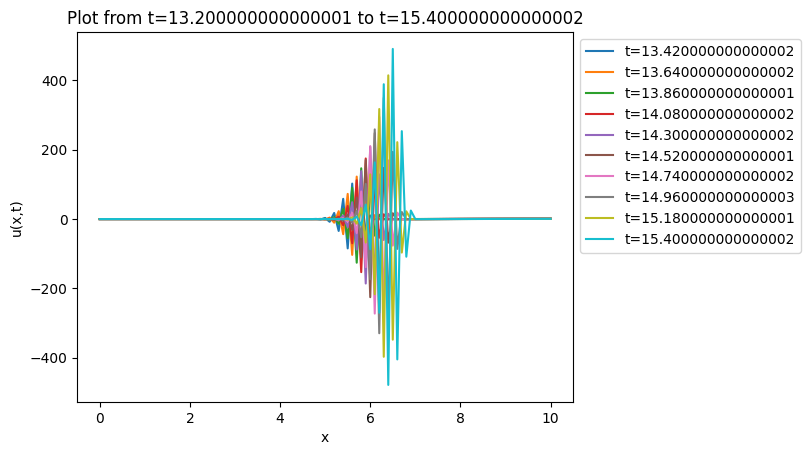

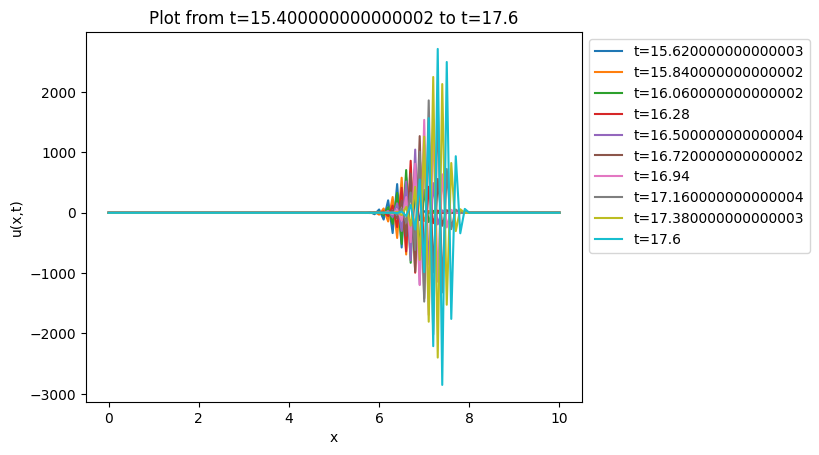

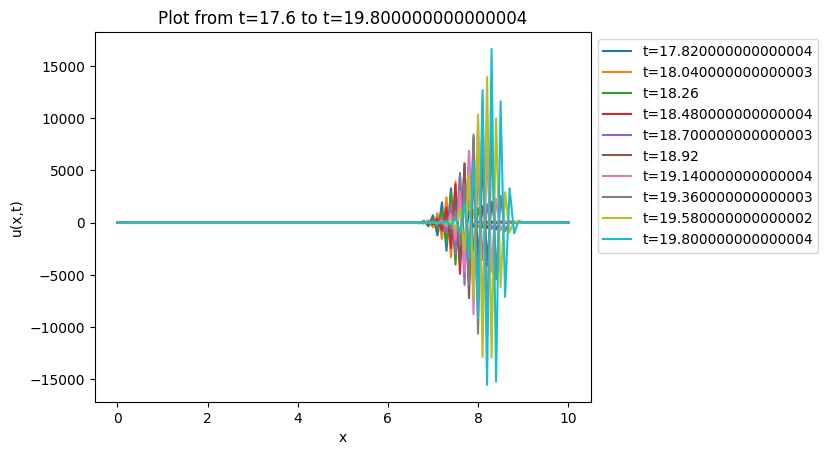

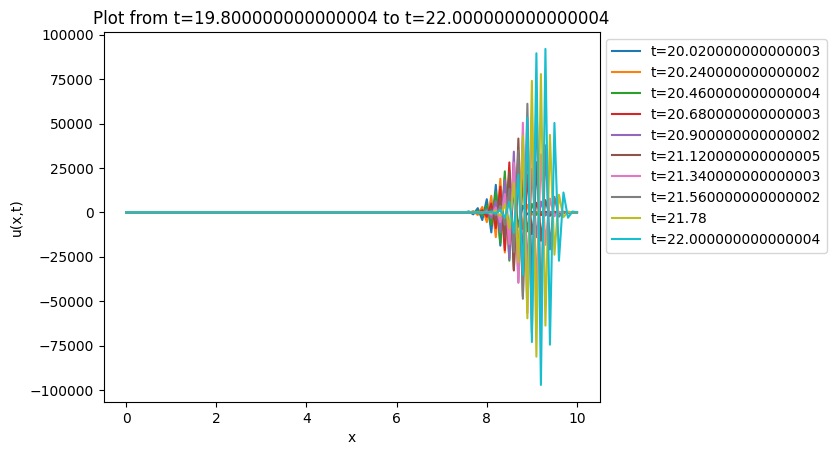

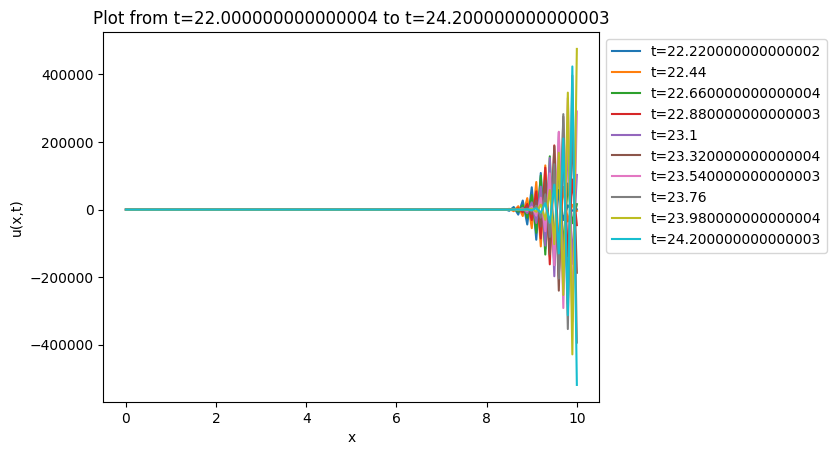

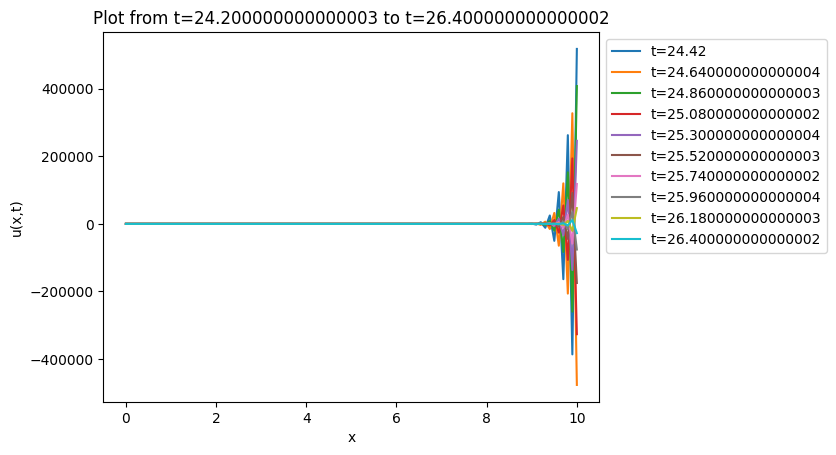

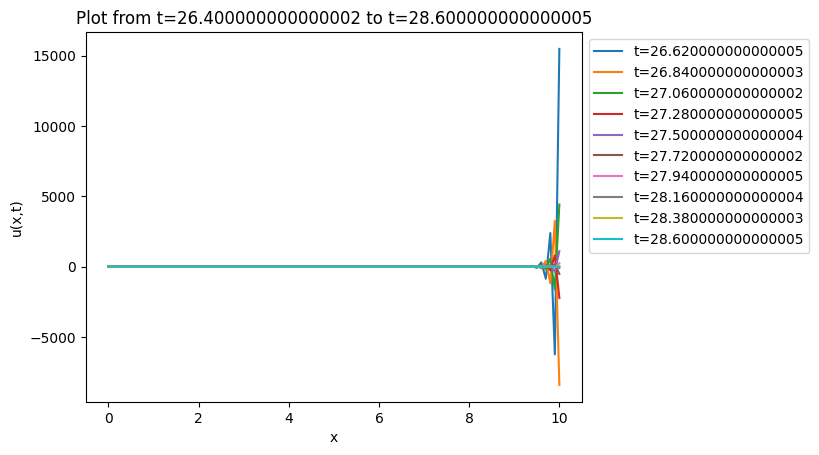

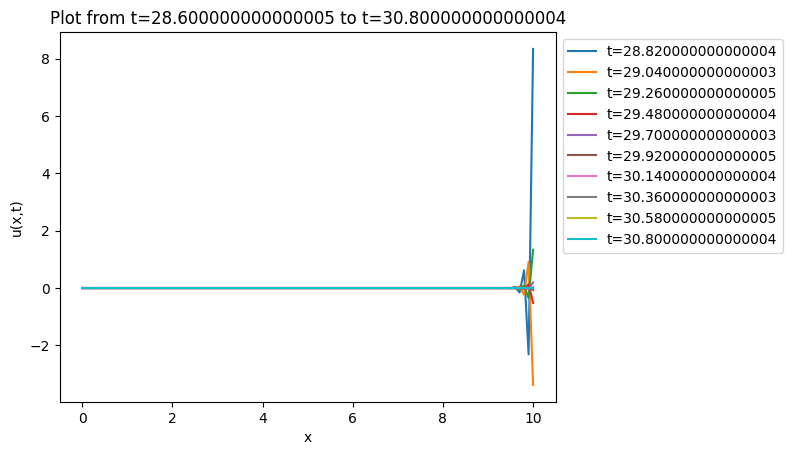

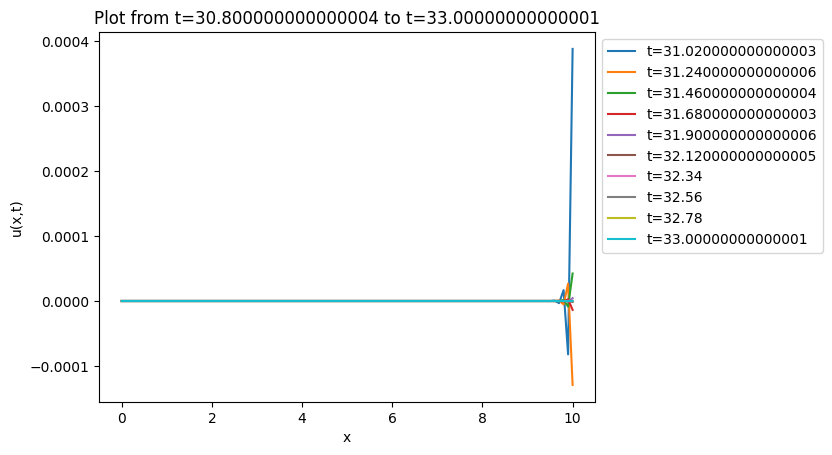

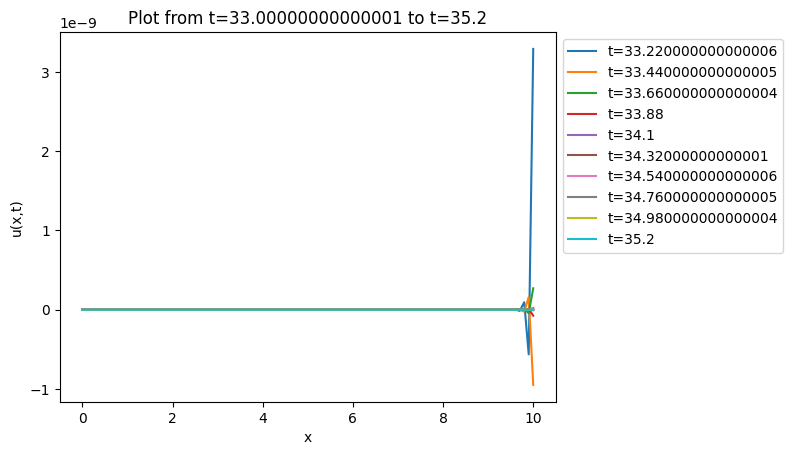

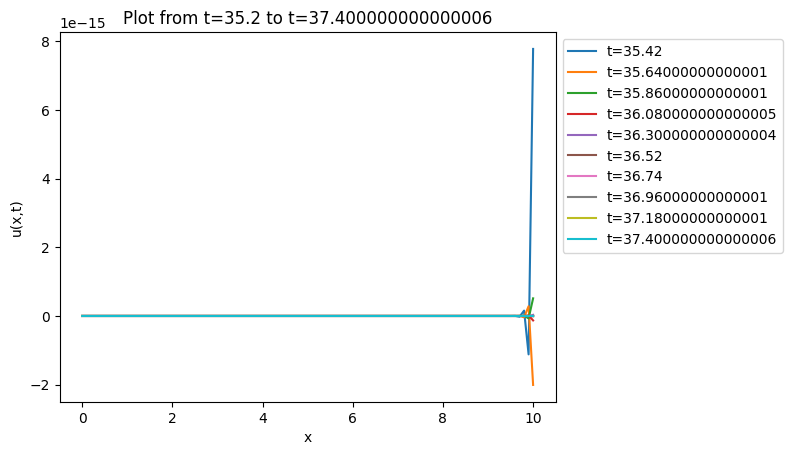

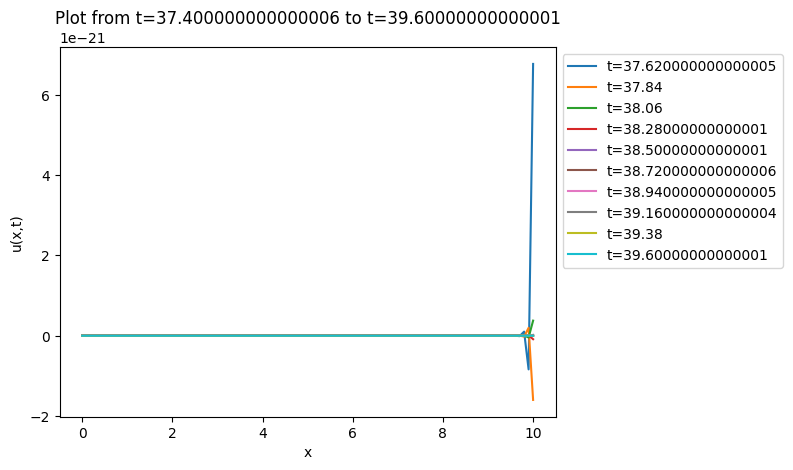

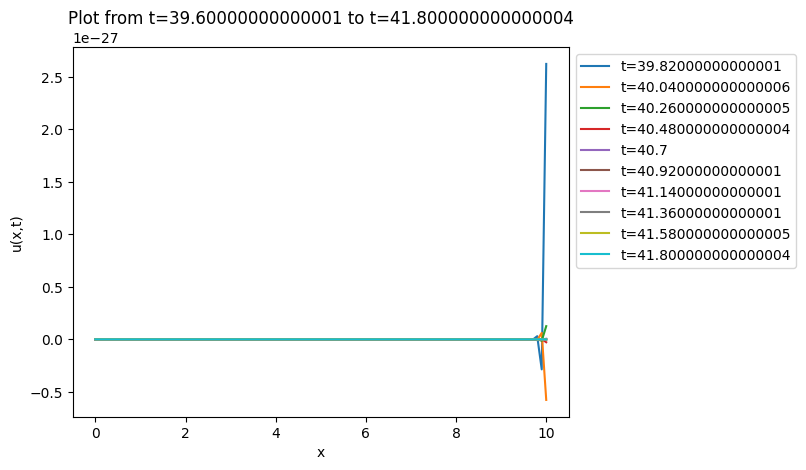

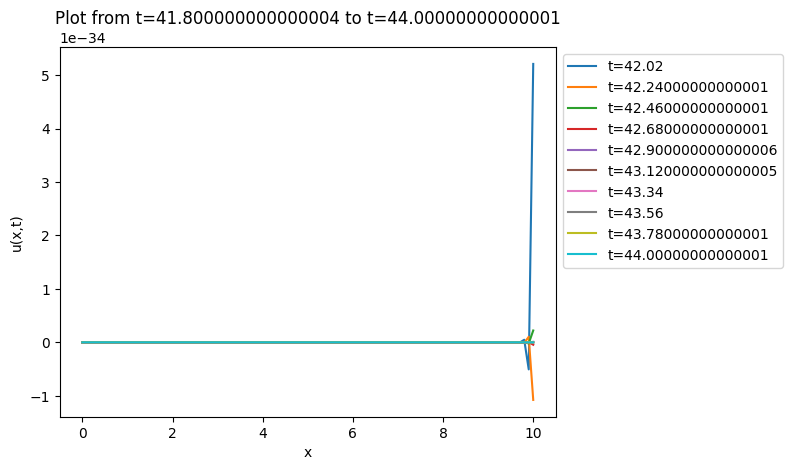

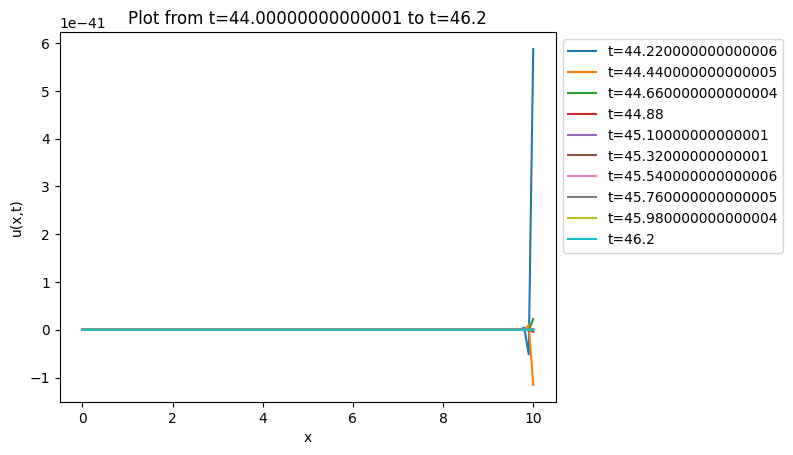

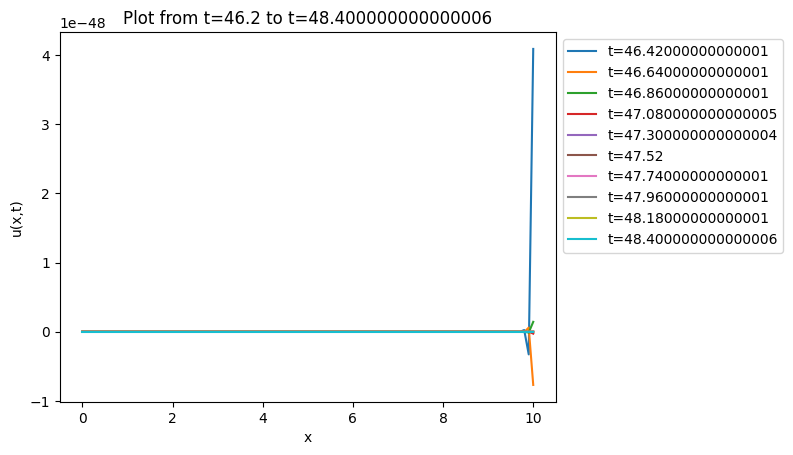

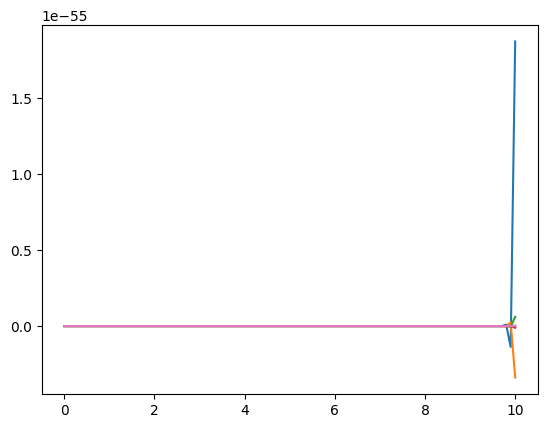

In [119]:
le=[]
for i in range(u.shape[0]):
    plt.plot(x,u[i])
    le.append(f't={t_initial+i*dt}')
    if i%10==0 and i!=0:
        plt.title(f'Plot from t={t_initial+(i-10)*dt} to t={t_initial+(i)*dt}')
        plt.legend(le,bbox_to_anchor=(1,1))
        plt.xlabel('x')
        plt.ylabel('u(x,t)')
        plt.show()
        le=[]